1η Εργαστηριακής Άσκησης:
---------------
**20201026 Οπτική Αναγνώριση Ψηφίων**


Σκοπός είναι η υλοποίηση ενός συστήματος οπτικής αναγνώρισης ψηφίων. Τα δεδομένα προέρχονται από την US Postal Service (γραμμένα στο χέρι σε ταχυδρομικούς φακέλους και σκαναρισμένα) και περιέχουν τα ψηφία από το 0 έως το 9 και διακρίνονται σε train και test.

Τα δεδομένα κάθε αρχείου αναπαριστούν τα περιεχόμενα ενός πίνακα  (οι τιμες των στοιχείων του πίνακα διαχωρίζονται με κενό). Κάθε γραμμή αφορά ένα ψηφίο (δείγμα). Οι στήλες αντιστοιχούν στα χαρακτηριστικά (features) που περιγράφουν τα ψηφία. Για παράδειγμα, η τιμή του (i,j) στοιχείου αφορά το j-th χαρακτηριστικό του i-th ψηφίου. Κάθε ψηφίο περιγράφεται από 257 τιμές, εκ των οποίων η πρώτη αντιστοιχεί στο ίδιο το ψηφίο (αν είναι το 0, το 1 κτλ.) και οι υπόλοιπες 256 είναι τα χαρακτηριστικά (features) που το περιγράφουν (grayscale values). Ας φανταστούμε το κάθε ψηφίο να απεικονίζεται σε έναν 16x16 πίνακα αποτελούμενο από 256 κουτάκια (“pixels”). Για να εμφανίζεται το κάθε ψηφίο στην οθόνη "φωτίζεται" ένα σύνολο από τέτοια κουτάκια, με τέτοιο τρόπο ώστε η συνολική εικόνα που βλέπουμε να απεικονίζει το θεωρούμενο ψηφίο. Επειδή τα ψηφία εμφανίζονται σε grayscale, κάθε μία από τις  256 τιμές αντιστοιχεί σε μία απόχρωση μαύρου για το αντίστοιχο “pixel”. Στόχος είναι η δημιουργία και αποτίμηση (evaluation) ταξινομητών οι οποίοι θα ταξινομούν κάθε ένα απο τα ψηφία που περιλαμβάνονται στα test δεδομένα σε μία από τις δέκα κατηγορίες (από το 0 έως το 9).  

**Βήμα 1:**

Διαβάστε τα δεδομένα από το αρχείο. Τα δεδομένα πρέπει να διαβαστούν σε μορφή συμβατή με το scikit-learn σε 4 πίνακες Χ_train, X_test, y_train και y_test. Ο πίνακας X_train περιέχει τα δείγματα εκπαίδευσης (χωρίς τα labels) και είναι διάστασης (n_samples_train x n_features). O y_train είναι ένας μονοδιάστατος πίνακας μήκους n_samples και περιέχει τα αντίστοιχα labels για τον X_train. Αντίστοιχα για τα test δεδομένα.


In [38]:
import numpy as np
matrix_train = np.loadtxt('D:/Αναγνώριση Προτύπων/LABS/LAB_1/pr_lab1_2020-21_data/train.txt')
matrix_test = np.loadtxt('D:/Αναγνώριση Προτύπων/LABS/LAB_1/pr_lab1_2020-21_data/test.txt')

X_train = matrix_train[:,1::]           
y_train = matrix_train[:,0] 
X_test = matrix_test[:,1::] 
y_test = matrix_test[:,0] 

y_train = y_train.astype(int)
y_test = y_test.astype(int)


print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (7291, 256)
y_train shape: (7291,)
X_test shape: (2007, 256)
y_test shape: (2007,)


**Βήμα 2:**
    
Σχεδιάστε το υπ’ αριθμόν 131 ψηφίο , (βρίσκεται στη θέση 131) των train δεδομένων. Υπόδειξη:
χρησιμοποιήστε τη συνάρτηση numpy.reshape για να οργανώσετε τα 256 χαρακτηριστικά σε ένα πίνακα 16x16,
και τη συνάρτηση matplotlib.pyplot.imshow για την απεικόνιση του ψηφίου

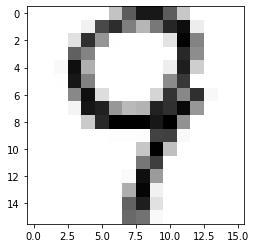

In [3]:
import matplotlib.pyplot as plt

num131 = X_train[131,:]
num131 = np.reshape(num131,(16,16))
plt.imshow(num131, cmap = 'gray_r')
plt.show()

**Βήμα 3:**

Διαλέξτε 1 τυχαίο δείγμα από κάθε label ,συνολικά 10 δείγματα). Σχεδιάστε τα σε ένα figure με subplots

***(Hint: fig = plt.figure(); fig.add_subplot(,,,))***

Number of training set for number:0 1194
Random example picked to be depicted: 5818
Number of training set for number:1 1005
Random example picked to be depicted: 3904
Number of training set for number:2 731
Random example picked to be depicted: 1945
Number of training set for number:3 658
Random example picked to be depicted: 4230
Number of training set for number:4 652
Random example picked to be depicted: 3255
Number of training set for number:5 556
Random example picked to be depicted: 2512
Number of training set for number:6 664
Random example picked to be depicted: 2777
Number of training set for number:7 645
Random example picked to be depicted: 238
Number of training set for number:8 542
Random example picked to be depicted: 69
Number of training set for number:9 644
Random example picked to be depicted: 3175


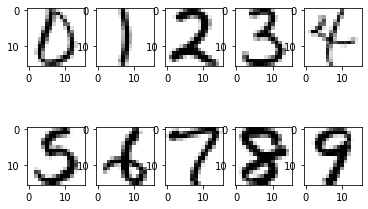

In [4]:
# import matplotlib.pyplot as plt 
import random 
fig = plt.figure()
for x in range(10):
    A = np.where(y_train ==x)
    print('Number of training set for number:'+np.str(x), len(A[0]))
    B = random.choice(A[0])
    print('Random example picked to be depicted:',B)
    C = np.reshape(X_train[B,:], (16,16))
    fig.add_subplot(2,5,x+1)
    plt.imshow(C, cmap = 'gray_r')
    
    
    

**Bήμα 4**

Υπολογίστε τη μέση τιμή των χαρακτηριστικών του pixel (10, 10) για το ψηφίο «0» με βάση τα train δεδομένα

In [46]:
index = X_train[np.where(y_train==0)[0]]
mean_value = np.mean(index[:, 171])
print(mean_value)


0.025442211055276373


**Βήμα 5**
Υπολογίστε τη διασπορά των χαρακτηριστικών του pixel (10, 10) για το ψηφίο «0» με βάση τα train δεδομένα.

In [47]:
var10 = np.var(index[:, 171])
print(var10)

0.7397550004292822


**Βήμα 6**
Υπολογίστε τη μέση τιμή και διασπορά των χαρακτηριστικών κάθε pixel για το ψηφίο «0» με βάση τα train
δεδομένα.

In [50]:
mean_all = np.mean(index,axis=0)
var_all = np.var(index,axis=0)
mean_all.shape
var_all.shape

(256,)

**Βήμα 7**
Σχεδιάστε το ψηφίο «0» χρησιμοποιώντας τις τιμές της μέσης τιμής που υπολογίσατε στο Βήμα 6.

Text(0.5, 1.0, 'Mean for digit 0')

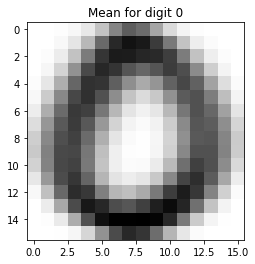

In [51]:
plt.imshow(np.reshape(mean_all,(16,16)),cmap = 'gray_r')
plt.title('Mean for digit 0')

**Βήμα 8**
Σχεδιάστε το ψηφίο «0» χρησιμοποιώντας τις τιμές της διασποράς που υπολογίσατε στο Βήμα 6. Συγκρίνετε το
αποτέλεσμα με το αποτέλεσμα του Βήματος 7 και εξηγείστε τυχόν διαφορές.

Text(0.5, 1.0, 'Var for digit 0')

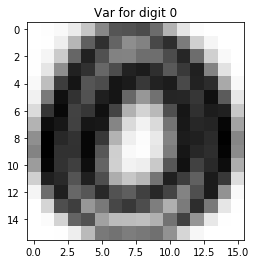

In [52]:
plt.imshow(np.reshape(var_all,(16,16)),cmap = 'gray_r')
plt.title('Var for digit 0')

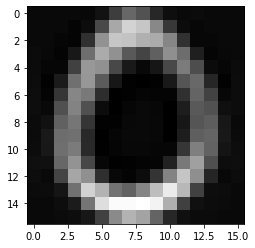

In [54]:
resh_mean = np.reshape(mean_all,(16,16))
resh_var = np.reshape(var_all,(16,16))
plt.imshow(resh_var - resh_mean, cmap = 'gray_r')

Text(0.5, 1.0, 'Var - Mean of Digit 0')

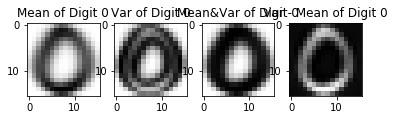

In [55]:
fig = plt.figure()
fig.add_subplot(1,4,1)
plt.imshow(resh_mean, cmap = 'gray_r'); plt.title('Mean of Digit 0')
fig.add_subplot(1,4,2)
plt.imshow(resh_var, cmap = 'gray_r'); plt.title('Var of Digit 0')
fig.add_subplot(1,4,3)
plt.imshow(resh_var + resh_mean, cmap = 'gray_r'); plt.title('Mean&Var of Digit 0')
fig.add_subplot(1,4,4)
plt.imshow(resh_var- resh_mean, cmap = 'gray_r'); plt.title('Var - Mean of Digit 0')

Variance measures how far a set of numbers spreads out of their average(mean) value. As we can observe from the figure 4 where we calculated the difference between the mean & the variance image there is a circled formed from missing values. Furthermore by observing figure 2 we can also notice the missing values in the middle which corresponds to the values of the mean. 

**Βήμα 9**

(α) Υπολογίστε τη μέση τιμή και διασπορά των χαρακτηριστικών για όλα τα ψηφία (0-9) με βάση τα train
δεδομένα.
(β) Σχεδιάστε όλα τα ψηφία χρησιμοποιώντας τις τιμές της μέσης τιμής που υπολογίσατε στο Βήμα 9(α).


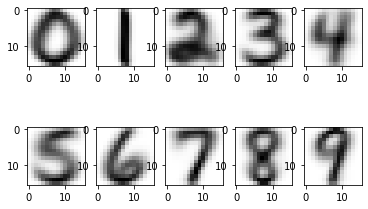

In [56]:
mat_means=[]
mat_var = []
for i in range(10):
    mat_means.append(np.mean(X_train[np.where(y_train==i)[0]],axis=0))
    mat_var.append(np.var(X_train[np.where(y_train==i)[0]],axis=0))


mat_means = np.array(mat_means)
mat_var = np.array(mat_var)
fig = plt.figure()
for i in range(10):
    fig.add_subplot(2,5,i+1)
    plt.imshow(np.reshape(mat_means[i,:], (16,16)), cmap = 'gray_r'); 

means = np.array(mat_means)
var = np.array(mat_var)

**Βήμα 10**

Ταξινομήστε το υπ΄αριθμόν 101 ψηφίο των test δεδομένων σε μία από τις 10 κατηγορίες (κάθε ένα από τα 10 ψηφία, 0-9, αντιπροσωπεύει μία κατηγορία) βάσει της Ευκλείδιας απόστασης (υπόδειξη: χρησιμοποιείστε τις τιμές που υπολογίσατε στο Βήμα 9(α)).  Ήταν επιτυχής η ταξινόμηση; 



[11.80262650292571, 17.02543574404843, 13.120591033576005, 13.60399136143054, 13.551686061946802, 13.431873633626532, 13.558851104940121, 15.914748915010568, 13.6892268434276, 14.626214599216999]
Prediction :  0
Η ταξινόμηση δεν ήταν επιτυχής


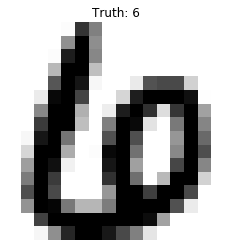

In [60]:
image = X_test[101].reshape(16,16)
imgplot = plt.imshow(image,cmap='binary')
plt.axis('off')
plt.title('Truth: ' + str(y_test[101]))
    
meansdist = []
varsdist = []

for i in range(0,10):
    meansdist.append(np.linalg.norm(X_test[101]-means[i]))

print(meansdist)
print("Prediction : ", meansdist.index(min(meansdist)))
print("Η ταξινόμηση δεν ήταν επιτυχής")

**Βήμα 11**

(α) Ταξινομήστε όλα τα ψηφία των test δεδομένων σε μία από τις 10 κατηγορίες με βάση την Ευκλείδια απόσταση. 

(β) Υπολογίστε το ποσοστό επιτυχίας για το Βήμα 11(α).

In [62]:
meansY = []
temp = []

for i in range (0,10):
    meansY.append(np.mean(X_test[np.where(y_test==i)[0]],axis=0))

meansdist_all = []

for j in range(0, len(X_test)):
    for i in range(0,10):
        temp.append(np.linalg.norm(X_test[j]-meansY[i]))
#     meansdist_all.append(temp.index(min(temp)))
    meansdist_all.append(np.argmin(temp))
    temp[:] = []

meansacc = accuracy_score(y_test, meansdist_all)
print("Accuracy :",meansacc)


Accuracy : 0.8196312904833084


**Βήμα 12:**

Υλοποιήστε τον ταξινομητή ευκλείδιας απόστασης σαν ένα scikit-learn estimator. Μπορείτε να χρησιμοποιήσετε αυτό τον κώδικα σαν βάση, υλοποιώντας τις μεθόδους fit, predict και score 

https://gist.github.com/georgepar/b53c01466d6649c8583497d120b9b479

In [64]:
from sklearn.base import BaseEstimator, ClassifierMixin

class EuclideanClassifier(BaseEstimator, ClassifierMixin):  
    """Classify samples based on the distance from the mean feature value"""

    def __init__(self,):
        self.X_mean_ = []


    def fit(self, X, y):
        """
        This should fit classifier. All the "work" should be done here.
        
        Calculates self.X_mean_ based on the mean 
        feature values in X for each class.
        
        self.X_mean_ becomes a numpy.ndarray of shape 
        (n_classes, n_features)
        
        fit always returns self.
        """
        self.number_of_labels_ = len(set(y))
        
        for i in range (0,self.number_of_labels_):
            self.X_mean_.append(np.mean(X[np.where(y==i)[0]],axis=0))
        
        self.X_mean_ = np.array(self.X_mean_)        
        return self


    def predict(self, X):
        """
        Make predictions for X based on the
        euclidean distance from self.X_mean_
        """
        self.X_predictions_ = []
        temp_ = []

        for j in range(0, len(X)):
            for i in range(0,self.number_of_labels_):
                temp_.append(np.linalg.norm(X[j]-self.X_mean_[i]))
            self.X_predictions_.append(np.argmin(temp_))
            temp_[:] = []
        return np.array(self.X_predictions_)

    
    def score(self, X, y):
        """
        Return accuracy score on the predictions
        for X based on ground truth y
        """
        return accuracy_score(y, X)



Accuracy score:  0.851323549581676


In [65]:
#Test The abobe function 

clf = EuclideanClassifier()
clf.fit(X_train,y_train)
ac_sc = clf.score(y_train, clf.predict(X_train))

print('Accuracy Score:', ac_sc)

Accuracy Score: 0.851323549581676


**Βήμα 13:**
    
α) Υπολογίστε το score του ευκλείδιου ταξινομητή με χρήση 5-fold cross-validation

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(EuclideanClassifier(), X_train, y_train, 
                         cv=KFold(n_splits=5, random_state=42), 
                         scoring="accuracy")
print("CV error = %f +-%f" % (1. - np.mean(scores), np.std(scores)))

C:\Users\DTryfonopoulos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CV error = 0.151420 +-0.001816


β) Σχεδιάστε την περιοχή απόφασης του ευκλείδιου ταξινομητή.

In [67]:
def plot_clf(clf, X, y, labels):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of Classifier')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    
    x_min, x_max = X0.min() - 1, X0.max() + 1
    y_min, y_max = X1.min() - 1, X1.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
                         np.arange(y_min, y_max, .05))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    zeros = ax.scatter(
        X0[y == 0], X1[y == 0],
        c='blue', label=labels[0],
        s=60, alpha=0.9, edgecolors='k')
    ones = ax.scatter(
        X0[y == 1], X1[y == 1],
        c='red', label=labels[1], 
        s=60, alpha=0.9, edgecolors='k')
    
    ax.set_ylabel(labels[1])
    ax.set_xlabel(labels[0])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

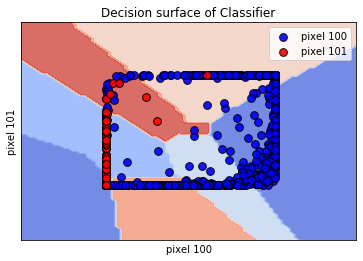

In [68]:
from sklearn.linear_model import LogisticRegression


X_new = X_train[:,100:102]
labels = ['pixel 100', 'pixel 101']

clf2 = EuclideanClassifier()
clf2.fit(X_new,y_train)

plot_clf(clf2, X_new, y_train, labels)

γ) Σχεδιάστε την καμπύλη εκμάθησης του ευκλείδιου ταξινομητή (learning curve)

In [69]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
                                                   estimator = EuclideanClassifier(), X = X_train,
                                                   y = y_train, cv = 5,train_sizes=np.linspace(.1, 1.0, 5),
                                                   scoring = 'accuracy')

C:\Users\DTryfonopoulos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\DTryfonopoulos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


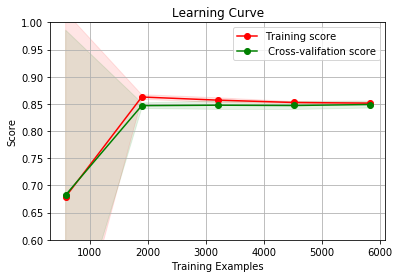

<module 'matplotlib.pyplot' from 'C:\\Users\\DTryfonopoulos\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [70]:
import matplotlib.pyplot as plt 

def plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(0,1)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None: 
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                    test_scores_mean + test_scores_std, alpha=0.1,
                    color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label = " Cross-valifation score")
    
    plt.legend(loc="best")
    plt.show()
    
    return plt 

plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(.6,1))

**Βήμα 14:**
    
Υπολογίστε τις a-priori πιθανότητες για κάθε κατηγορία.

In [74]:
aPriory=[]

for i in range(10):
    aPriory.append(len(X_train[np.where(y_train==i)])/ len(X_train))
aPriory = np.array(aPriory)
print('aPriori:', aPriory)

aPriori: [0.16376354 0.13784117 0.1002606  0.09024825 0.08942532 0.0762584
 0.09107118 0.08846523 0.07433823 0.08832808]


**Βήμα 15:**
    
(α) Ταξινομήστε όλα τα ψηφία των test δεδομένων ως προς τις 10 κατηγορίες χρησιμοποιώντας τις τιμές της μέσης τιμής και διασποράς που υπολογίσατε στο Βήμα 9(α), υλοποιώντας έναν Bayesian ταξινομητή. Μην χρησιμοποιήσετε έτοιμες υλοποιήσεις. (Extra credit: αν η υλοποίηση σας είναι συμβατή με το scikit-learn όπως δείξαμε στο βήμα 12)

In [75]:
def NB_custom (x,mean, var):
    var = var + 10**(-100)
    expo = np.exp(-np.sum((np.power(x-mean,2)/(2*var))))
    dvar = 10** (-100)
    return (1/(np.sqrt(2*np.pi)*dvar))* expo

probab = np.zeros((len(X_test), 10))
pred = []
for i in range(len(X_test)):
    for j in range(10):
        prob = NB_custom(X_test[i], means[j], var[j])
        probab [i][j] = aPriory[j] *prob
    pred.append(np.argmax(probab[i]))
    
pred = np.array(pred)

print (probab.shape)

(2007, 10)


(β) Υπολογίστε το σκορ για το Βήμα 15(α).

In [76]:
acc_score = accuracy_score(y_test,pred)
('Accyracy of NB custom classifier:'),acc_score

('Accyracy of NB custom classifier:', 0.8211260587942202)

(γ) Συγκρίνετε την υλοποίηση σας του Naive Bayes με την υλοποίηση του scikit-learn (GaussianNB).

In [80]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

NB_sklearn = accuracy_score(y_test, clf.predict(X_test))
print('Accyracy of NB sklearn classifier:',NB_sklearn)

Accyracy of NB sklearn classifier: 0.7194818136522172


In [81]:
print("My Custom_NB Classifier is better from the sklearn_NB classifier for:")
print ((acc_score - NB_sklearn)/NB_sklearn * 100, '%')

My Custom_NB Classifier is better from the sklearn_NB classifier for:
14.127423822714682 %


**Βήμα 16:**
    
Επαναλάβατε το Βήμα 15(α), (β) υποθέτοντας ότι η διασπορά για όλα τα χαρακτηριστικά, για όλες τις κατηγορίες ισούται με 1.

In [82]:
new_var = 1 
probab_2  = np.zeros((len(X_test),10))
pred_2 = []

for i in range(len(X_test)):
    for j in range(10):
        prob = NB_custom(X_test[i], means[j], new_var)
        probab_2[i,j] = aPriory[j]*prob
    pred_2.append(np.argmax(probab_2[i]))
    
NB_custom_2 = accuracy_score(y_test,pred_2)

print('Accyracy of NB custom classifier with var=1:',NB_custom_2)

Accyracy of NB custom classifier with var=1: 0.8126557050323866


**Βήμα 17:**
    
Συγκρίνετε την επίδοση των ταξινομητών Naive Bayes, Nearest Neighbors, SVM (με διαφορετικούς kernels). Μπορείτε να χρησιμοποιήσετε τις υλοποιήσεις του scikit-learn. 

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print('Nearest Neighbors accuracy:', knn_acc)

# SVM
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm.predict(X_test))
print('SVM accuracy:', svm_acc)

Nearest Neighbors accuracy: 0.9431988041853513
SVM accuracy: 0.9422022919780767


**Βήμα 18:**
    
Η βασική ιδέα του βήματος αυτού είναι ο συνδυασμός κάποιων ταξινομητών με αρκετά καλή επίδοση με στόχο να επιτευχθεί επίδοση υψηλότερη των επιμέρους επιδόσεων. Αυτή η τεχνική είναι γνωστή ως ensembling. Είναι σημαντικό οι ταξινομητές που θα συνδυαστούν να χαρακτηρίζονται από διαφορετικό τύπο λαθών, π.χ., ο ένας ταξινόμητής να τείνει να ταξινομεί λάθος το ψηφίο 3, ενώ ένας άλλος να τείνει να ταξινομεί λάθος το ψηφίο 7. α) Επιλέξτε κάποιους από τους ταξινομητές που χρησιμοποιήσατε στα προηγούμενα βήματα. Χρησιμοποιήστε το VotingClassifier του scikit-learn για να τους συνδυάσετε σε hard ή soft voting. Αυτός ο μεταταξινομητής συνδυάζει τους επιμέρους ταξινομητές βάζοντάς τους να ψηφίσουν για το αποτέλεσμα. Πρέπει να επιλέξετε μονό αριθμό ταξινομητών. Γιατί;

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10)
estimators=[]

model1 = LogisticRegression()
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('decTree', model2))

model3 = SVC()
estimators.append(('svm', model3))

#Create Ensemble Model 
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_test, y_test, cv = kfold)

print('Results for the ensembling method:', results.mean())
print(' The odd number of classifiers avoids the draws when measuring the score')


C:\Users\DTryfonopoulos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\DTryfonopoulos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    http

Results for the ensembling method: 0.9043358208955222
 The odd number of classifiers avoids the draws when measuring the score


β) Επιλέξτε έναν ταξινομητή από τα προηγούμενα βήματα και χρησιμοποιήστε τον BaggingClassifier για να δημιουργήσετε ένα ensemble. Η τεχνική bagging, αφορά στο χωρισμό του (training) dataset σε τυχαία υποσύνολα (με πιθανές επικαλύψεις) και την εφαρμογή ενός ταξινομητή σε κάθε ένα από αυτά. Η τελική απόφαση βγαίνει μέσω ψηφοφορίας ή μέσου όρου των προβλέψεων των επιμέρους ταξινομητών. Ο συνδυασμός αυτής της τεχνικής με Decision Trees μας δίνει τον ταξινομητή Random Forest.

In [86]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(SVC(gamma='auto'), max_samples=0.5, max_features=0.5)

bagging.fit(X_train, y_train)
bagging_acc = ensemble_acc= accuracy_score(y_test, bagging.predict(X_test))
print('SVM:', bagging_acc)

bagging_2 = BaggingClassifier(base_estimator=None)
bagging_2.fit(X_train, y_train)
bagging_acc2 = ensemble_acc = accuracy_score(y_test, bagging_2.predict(X_test))
print('Decision Tree:', bagging_acc2)

SVM: 0.9332336821126059
Decision Tree: 0.8809167912306926


**Βήμα 19:**
    
Σε αυτό το βήμα θα κάνουμε μια εισαγωγή στα νευρωνικά δίκτυα και στη βιβλιοθήκη PyTorch. α) Υλοποιήστε έναν dataloader για να αναλάβει την ανάγνωση των δεδομένων και τον χωρισμό σε batches. Ακολουθήστε αυτές τις οδηγίες (https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) β) Υλοποιήστε ένα fully connected νευρωνικό δίκτυο σε PyTorch σαν μια υποκλάση της nn.Module. και εκπαιδεύστε το στα δεδομένα. Πειραματιστείτε με τον αριθμό των νευρώνων, τον αριθμό των layers και τον τύπο των μη γραμμικών actications. (οδηγίες: https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html γ) Γράψτε τον κώδικα για την εκπαίδευση και το evaluation του νευρωνικού (συμβατή με το scikit-learn βλ. Βήμα 12). Χωρίστε το dataset σε train και validation για το training. δ) Αξιολογήστε την επίδοση του νευρωνικού στα δεδομένα test.